<a href="https://colab.research.google.com/github/rnrrmr/image_classification/blob/main/weather_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %cd /content/drive/MyDrive/weather-dataset
# !unzip -qq "/content/drive/MyDrive/weather.zip"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
# ### 이거이제 쓰지말고 바로 다음코드로
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.utils import to_categorical
# import os

# # 데이터 디렉토리 경로
# data_dir = "/content/drive/MyDrive/weather-dataset/dataset"

# # 클래스 레이블 추출
# class_labels = os.listdir(data_dir)

# # 이미지 데이터 및 레이블 리스트 초기화
# images = []
# labels = []

# for label_index, label in enumerate(class_labels):
#     label_dir = os.path.join(data_dir, label)
#     for img_filename in os.listdir(label_dir):
#         img_path = os.path.join(label_dir, img_filename)
#         img = load_img(img_path, target_size=(224, 224))  # 이미지 로드 및 크기 조정
#         img_array = img_to_array(img)  # 이미지를 NumPy 배열로 변환

#         # 모델에 입력하기 전에 이미지 배열을 정규화
#         img_array = img_array / 255.0  # 이미지 값을 [0, 1] 범위로 정규화

#         images.append(img_array)
#         labels.append(label_index)

# # NumPy 배열로 변환
# X = np.array(images)
# y = to_categorical(labels, num_classes=len(class_labels))  # 원-핫 인코딩

# # 데이터 분할 (필요하다면)
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 램 과도한 사용으로 인한 코드 변경
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # 이미지 값을 [0, 1] 범위로 정규화
    validation_split=0.2  # 검증 데이터의 비율을 설정 (예: 0.2는 20%의 데이터를 검증 데이터로 사용)
)

# 데이터 디렉토리 경로
data_dir = "/content/drive/MyDrive/weather-dataset/dataset"

batch_size = 32

# 학습용 데이터 로드
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # 이미지 크기를 조정
    batch_size=batch_size,
    class_mode='categorical',  # 다중 클래스 분류를 위한 설정
    subset='training'  # 학습 데이터로 설정
)
# 검증용 데이터 로드
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # 검증 데이터로 설정
)

# 테스트용 데이터 로드
test_data_dir = "/content/drive/MyDrive/weather-dataset/weather_sample"
test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# test_data_dir = "/content/drive/MyDrive/weather-dataset/test_data"

# test_generator = datagen.flow_from_directory(
#     test_data_dir,
#     target_size=(224, 224),
#     batch_size=batch_size,
#     class_mode='categorical'
# )

Found 4282 images belonging to 11 classes.
Found 1066 images belonging to 11 classes.
Found 0 images belonging to 0 classes.


결과를 보면 학습용 데이터와 검증용 데이터는 정상적으로 찾아지고 있지만 테스트 데이터는 찾지 못하고 있습니다. 이는 데이터 디렉토리 경로 또는 디렉토리 구조에 문제가 있을 가능성이 있습니다.

가장 먼저 확인해야 할 사항은 `test_data_dir` 변수의 경로가 올바른지 확인하는 것입니다. `test_data_dir`가 정확한 테스트 데이터 디렉토리 경로를 가리키고 있는지 다시 한 번 확인해주세요.

또한, 테스트 데이터 디렉토리인 `/content/drive/MyDrive/weather-dataset/weather_sample` 내에 이미지 파일이 있는지 확인하세요. 테스트 데이터 디렉토리 안에 이미지 파일들이 있어야 `flow_from_directory` 함수가 해당 디렉토리에서 이미지를 찾아 로드할 수 있습니다.

경로와 데이터 파일의 유무를 확인한 후에도 문제가 지속된다면 데이터 디렉토리 구조를 다시 한 번 확인하여 모든 클래스의 이미지가 올바른 하위 디렉토리에 있는지 확인해야 합니다. 테스트 데이터 디렉토리 안에 이미지 파일들을 클래스 별로 디렉토리로 구성해야 합니다. 예를 들어:

```
- test_data_dir/
  - class1/
    - image1.jpg
    - image2.jpg
    ...
  - class2/
    - image1.jpg
    - image2.jpg
    ...
  ...
```

위와 같이 클래스별로 디렉토리를 나누고 그 안에 해당 클래스에 속하는 이미지 파일을 넣어야 합니다. 디렉토리 구조를 확인하고 필요한 경우 수정한 후에 다시 시도해보세요.

테스트 데이터는 모델을 학습하는 과정에 직접적으로 관여하지 않으며, 모델 학습 후에 최종적인 성능 평가를 위해 사용됩니다. 따라서 ImageDataGenerator에 validation_split을 설정할 필요는 없으며, 일반적으로 테스트 데이터는 학습 및 검증 데이터와 별도로 저장하고 로드합니다.

테스트 데이터를 추가하려면, 테스트 데이터의 디렉토리를 따로 만들고 그 디렉토리에서 ImageDataGenerator를 사용하여 테스트 데이터를 로드하면 됩니다

ImageDataGenerator를 사용하여 이미지 데이터를 배치로 로드하는 경우, 클래스 레이블을 직접 추출할 필요가 없습니다. ImageDataGenerator는 디렉토리 구조를 통해 클래스 레이블을 자동으로 인식합니다. 따라서 원래 코드에서 클래스 레이블을 추출하는 부분은 제거해도 됩니다.

## Data Augmentation

## Import the Data

In [ ]:
class_names = class_labels
print(class_names)

NameError: ignored

## Download the pretrained model

## Adding new layers + freezing layers

이미지 보정은 일반적으로 양선형 보간법(bilinear interpolation)을 사용하여 수행됨.

양선형 보간법(bilinear interpolation)은 이미지 처리와 그래픽스에서 사용되는 일반적인 보간(Interpolation) 기법 중 하나입니다. 보간은 주어진 데이터 포인트들 사이의 값을 추정하거나 채우는 과정으로, 데이터 포인트 사이의 값을 부드럽게 연결하기 위해 사용됩니다.

양선형 보간법은 주로 이미지 크기를 변경하거나 이미지의 회전, 변환 등을 수행할 때 사용됩니다. 이 방법은 각 픽셀의 값을 추정하는 데 사용되며, 주변 픽셀의 값을 고려하여 보간 결과를 계산합니다. 보간된 값은 주변 픽셀의 가중 평균으로 계산됩니다.

양선형 보간법의 주요 특징은 다음과 같습니다:

1. **부드러운 결과**: 양선형 보간법은 주변 픽셀을 고려하여 값을 추정하기 때문에 결과가 부드럽고 자연스럽게 보입니다.

2. **정확성**: 이 방법은 주어진 데이터 포인트 사이의 값을 정확하게 추정하는데 도움이 됩니다.

3. **계산 비용**: 다른 일부 보간 방법에 비해 계산 비용이 높을 수 있지만, 고성능 하드웨어와 소프트웨어 환경에서는 효율적으로 구현될 수 있습니다.

양선형 보간법은 이미지 리사이징, 회전, 이동 및 확대/축소와 같은 이미지 변형 작업에서 자주 사용됩니다. 이를 통해 이미지의 화질을 유지하면서 크기나 모양을 조절할 수 있습니다.

In [ ]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# # 원하는 이미지 크기로 조정
# desired_image_size = (224, 224)
# img = load_img("your_image.jpg", target_size=desired_image_size)
# img_array = img_to_array(img)

# # 모델에 입력하기 전에 이미지 배열을 정규화
# img_array = img_array / 255.0  # 이미지 값을 [0, 1] 범위로 정규화

# # 모델에 입력 이미지로 사용
# # 이거 일단 안함

In [ ]:
# 모델 정의
model = keras.Sequential()

# 입력 레이어 (224x224 크기의 RGB 이미지)
model.add(keras.layers.Input(shape=(224, 224, 3)))

# 컨볼루션 레이어 (첫 번째 블록)
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

# 컨볼루션 레이어 (두 번째 블록)
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

# 컨볼루션 레이어 (세 번째 블록)
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

# 컨볼루션 레이어 (네 번째 블록)
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

# 컨볼루션 레이어 (다섯 번째 블록)
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

# 글로벌 평균 풀링 레이어
model.add(keras.layers.GlobalAveragePooling2D())

# 완전 연결 레이어 (분류 레이어)
model.add(keras.layers.Dense(11, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 구조 요약
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

## Compile the model

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

"Adam"은 매우 효과적인 최적화 알고리즘 중 하나로, 신경망 모델의 가중치를 업데이트하는 데 사용됩니다. 아담은 특히 딥러닝 모델에서 널리 사용되며, 다음과 같은 이유로 많이 선택됩니다:

1. **자동 학습률 조정**: Adam은 학습률을 자동으로 조절하는 기능을 갖고 있어서 초기에는 큰 학습률로 시작하고 점차 작아지도록 조절합니다. 이렇게 하면 모델이 수렴하기 더 빠르고 안정적으로 수렴할 수 있습니다.

2. **모멘텀과 RMSprop 결합**: Adam은 모멘텀 최적화와 RMSprop의 이점을 결합한 것으로, 모델 파라미터를 업데이트할 때 과거 그래디언트 정보를 고려하여 진행 방향을 조절하고 학습률을 조절합니다. 이렇게 함으로써 안정적인 수렴을 돕습니다.

3. **무작위 초기화에 강한 성능**: Adam은 초기 가중치 값이 무작위로 설정되더라도 좋은 성능을 보이는 경향이 있어 초기화에 민감하지 않습니다.

4. **다양한 문제에 적용 가능**: Adam은 다양한 유형의 딥러닝 모델 및 다양한 문제에 적용할 수 있는 범용적인 최적화 알고리즘입니다.

5. **일반적으로 빠른 수렴**: Adam은 많은 경우 다른 최적화 알고리즘보다 빠르게 수렴하며, 특히 대규모 데이터셋 및 복잡한 신경망에서 유용합니다.

## Callbacks

In [ ]:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

`my_callbacks`라는 변수에 포함된 콜백(callback)은 모델 훈련 중에 사용되며, 주로 모델의 성능을 모니터링하고 훈련을 제어하는 데 사용됩니다. 여기에서 사용된 콜백은 `EarlyStopping` 콜백입니다. 이 콜백은 다음과 같은 매개변수를 가지고 있습니다:

- `monitor`: 모델 성능을 모니터링할 지표를 지정합니다. 이 경우에는 검증 손실(`val_loss`)을 모니터링하며, 검증 손실이 줄어들지 않을 때 조기 종료를 수행하게 됩니다.

- `min_delta`: 모니터링 지표(`monitor`)의 개선을 감지하기 위한 최소 변화량을 정의합니다. 예를 들어, `min_delta=0.01`로 설정하면 0.01보다 작은 변화가 있을 때 조기 종료하지 않습니다. 이 값은 선택적으로 설정할 수 있습니다.

- `patience`: 조기 종료를 수행하기 전에 지정된 지표(`monitor`)가 개선되지 않는 에포크 수를 정의합니다. 예를 들어, `patience=2`로 설정하면 검증 손실이 2번의 에포크 동안 개선되지 않으면 훈련을 조기 종료합니다.

- `mode`: 모니터링 지표(`monitor`)의 개선 방향을 지정합니다. "auto", "min", "max" 중 하나를 선택할 수 있습니다. "auto"로 설정하면 자동으로 최적의 방향을 결정하며, 예를 들어 손실 지표인 경우 "min" 방향으로 설정됩니다. "min"은 손실을 최소화하고 "max"는 정확도 등을 최대화합니다.

`EarlyStopping` 콜백은 주로 과적합을 방지하고 효율적인 모델 훈련을 위해 사용됩니다. 검증 손실이 더 이상 개선되지 않으면 훈련을 조기 종료하고 최상의 모델 가중치를 저장할 수 있습니다. 이렇게 함으로써 불필요한 에포크를 피하고 효율적인 훈련을 수행할 수 있습니다.

## Fit the model

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=my_callbacks,
    verbose=1
)

Epoch 1/5
134/134 [==============================] - 95s 508ms/step - loss: 2.1999 - accuracy: 0.1632 - val_loss: 2.1434 - val_accuracy: 0.1304
Epoch 2/5
134/134 [==============================] - 56s 414ms/step - loss: 2.1662 - accuracy: 0.1714 - val_loss: 2.1436 - val_accuracy: 0.1595
Epoch 3/5
134/134 [==============================] - 56s 413ms/step - loss: 2.1396 - accuracy: 0.1695 - val_loss: 2.1332 - val_accuracy: 0.1595
Epoch 4/5
134/134 [==============================] - 61s 450ms/step - loss: 2.1353 - accuracy: 0.1780 - val_loss: 2.1330 - val_accuracy: 0.1792
Epoch 5/5
134/134 [==============================] - 56s 418ms/step - loss: 2.2060 - accuracy: 0.1700 - val_loss: 2.1391 - val_accuracy: 0.1792


일반적으로 함수 인자로 verbose가 있으면 함수 수행시 발생하는 상세한 정보들을 표준 출력으로 자세히 내보낼 것인가를 나타냅니다. 보통 0 은 출력하지 않고, 1은 자세히, 2는 함축적인 정보만 출력하는 형태로 되어 있습니다.

## Fine Tuning the model

Fine-tuning은 사전 훈련된(pre-trained) 모델을 가져와서 추가적인 훈련을 수행하는 기술입니다. 이것을 사용하는 이유는 다음과 같습니다:

1. **전이 학습(Transfer Learning)**: 사전 훈련된 모델은 대규모 데이터셋에서 학습된 가중치를 갖고 있으며, 이미지 분류, 객체 검출 등 다양한 작업에 대해 풍부한 특징을 학습한 경험이 있습니다. 따라서 이러한 모델을 새로운 작업에 재활용하면 초기 가중치를 무작위 초기화보다 훨씬 효과적으로 학습할 수 있습니다.

2. **데이터 부족 문제 해결**: 새로운 작업을 위해 충분한 양의 레이블된 데이터를 얻기는 어려울 때, 사전 훈련된 모델을 사용하여 데이터 부족 문제를 해결할 수 있습니다. 사전 훈련된 모델은 더 적은 데이터로도 좋은 성능을 달성할 수 있습니다.

3. **속도 향상**: 사전 훈련된 모델을 사용하면 초기 학습 단계에서 가중치를 동결(frozen)하고 기존의 특징 추출 레이어를 사용할 수 있으므로 학습 속도가 향상됩니다. 그런 다음 일부 레이어의 가중치만 업데이트하여 새로운 작업에 맞게 모델을 조정합니다.

4. **일반화 능력 향상**: 사전 훈련된 모델은 다양한 이미지와 특징을 학습하였으며, 이를 새로운 작업에 활용함으로써 모델의 일반화 능력을 향상시킬 수 있습니다.

따라서 fine-tuning은 모델의 초기 가중치를 개선하고 새로운 작업에 맞게 조정하여 성능을 향상시키는 유용한 전략입니다. 하지만 fine-tuning 시에는 몇 가지 주의할 점이 있으며, 훈련 데이터의 특성과 작업에 맞게 적절한 레이어를 선택하고 학습률 등의 하이퍼파라미터를 조정해야 합니다.

In [ ]:
# Unfreeze the base model
base_model.trainable = True
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = Dense(11, activation='softmax')(x)
model = keras.Model(inputs, outputs)

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss = 'categorical_crossentropy',
              metrics=['accuracy'],
              )

In [ ]:
# history = model.fit(
#     train,
#     validation_data=validation,
#     epochs=5,
#     callbacks=my_callbacks,
#     verbose=1
# )

## Predictions

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    # 이미지 불러오기 및 전처리
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1, 224, 224, 3)
    image = preprocess_input(image)

    # 모델로 예측 수행
    preds = model.predict(image)

    # 클래스 인덱스와 예측 확률 추출
    predicted_class_index = np.argmax(preds)
    predicted_probability = preds[0][predicted_class_index]

    # 클래스 이름 추출
    predicted_class = class_names[predicted_class_index]

    # 이미지 시각화
    show_image(image_path)

    # 예측 결과 출력
    print(f"Predicted class: {predicted_class}")
    print(f"Probability: {predicted_probability:.2%}")

    return preds


In [ ]:
def make_predictions(image_path):
    # 이미지 불러오기 및 전처리
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1, 224, 224, 3)
    image = preprocess_input(image)

    # 모델로 예측 수행
    preds = model.predict(image)

    # 클래스 인덱스와 예측 확률 추출
    predicted_class_index = np.argmax(preds)

    # 이미지 시각화
    show_image(image_path)

    # 예측 결과 출력
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Probability: {preds[0][predicted_class_index]:.2%}")

    return preds

In [ ]:
import os
class_labels = os.listdir(data_dir)

In [ ]:
def make_predictions(image_path):
    # 이미지 불러오기 및 전처리
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1, 224, 224, 3)
    image = preprocess_input(image)

    # 모델로 예측 수행
    preds = model.predict(image)

    # 클래스 인덱스와 예측 확률 추출
    predicted_class_index = np.argmax(preds)

    # 클래스명 가져오기
    predicted_class = class_labels[predicted_class_index]

    # 이미지 시각화
    show_image(image_path)

    # 예측 결과 출력
    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted class name: {predicted_class}")
    print(f"Probability: {preds[0][predicted_class_index]:.2%}")

    return preds


In [ ]:
class_names

NameError: ignored

In [ ]:
class_names[np.argmax(make_predictions("/content/drive/MyDrive/weather-dataset/weather_sample/image4"))]

NameError: ignored

1/1 [==============================] - 0s 30ms/step
Predicted class index: 8
Predicted class name: rime
Probability: 89.58%


array([[1.7767057e-03, 2.7368192e-03, 6.4038765e-08, 9.7822420e-02,
        7.2547654e-04, 3.0771989e-05, 1.0801989e-03, 1.8689997e-07,
        8.9582735e-01, 9.6815904e-30, 1.2835617e-29]], dtype=float32)

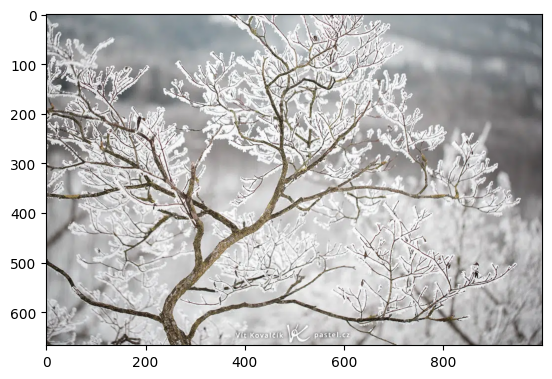

In [ ]:
make_predictions("/content/drive/MyDrive/weather-dataset/weather_sample/image4.jpg")

1/1 [==============================] - 0s 35ms/step
Predicted class index: 8
Predicted class name: rime
Probability: 34.70%


array([[9.00367424e-02, 1.11818701e-01, 1.10459998e-02, 2.19000369e-01,
        9.09757912e-02, 3.91565114e-02, 7.97434673e-02, 1.12402067e-02,
        3.46982002e-01, 1.18933158e-07, 1.18321005e-07]], dtype=float32)

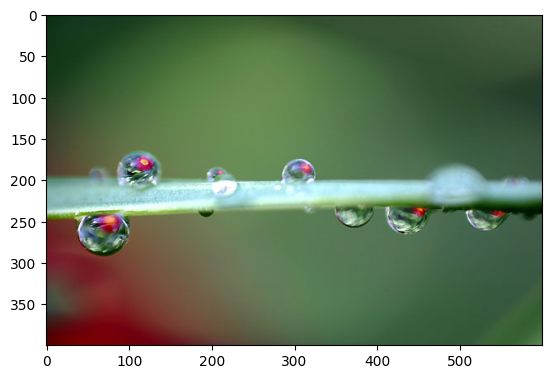

In [ ]:
make_predictions("/content/drive/MyDrive/weather-dataset/weather_sample/image2.jpg")

1/1 [==============================] - 0s 52ms/step
Predicted class index: 8
Predicted class name: rime
Probability: 67.01%


array([[2.6413122e-02, 3.6419541e-02, 1.4440855e-04, 2.2252917e-01,
        2.0399587e-02, 3.3965833e-03, 2.0411467e-02, 2.1830486e-04,
        6.7006779e-01, 5.5402006e-16, 6.1557638e-16]], dtype=float32)

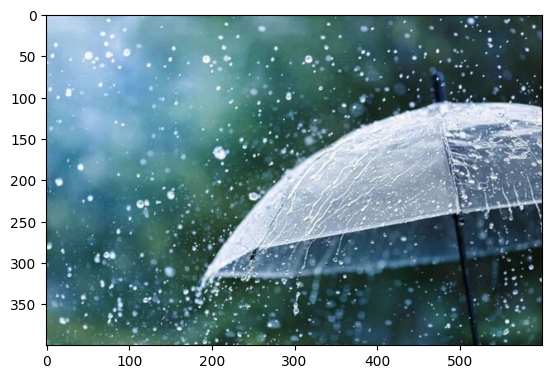

In [ ]:
make_predictions("/content/drive/MyDrive/weather-dataset/weather_sample/image7.jpg")

In [ ]:
class_names[np.argmax(make_predictions("/content/drive/MyDrive/weather-dataset/weather_sample/image10"))]

In [ ]:
class_names[np.argmax(make_predictions("/content/drive/MyDrive/weather-dataset/weather_sample/L2"))]